<a href="https://colab.research.google.com/github/estevaomcs/PROJETO-SOJA/blob/main/Indicadores%20de%20cartel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [ ]:
dt = pd.read_excel(r"C:\Users\estev_p\Desktop\ESMG\ECONOMIA\PIBIC\artigos\oficiais\Planilhas municipios\Semanal Municipios 2004-2020\Abaetetuba\Abaetetuba Gasolina.xlsx")

In [ ]:

dt['pmd'] = pd.to_numeric(dt['PREÇO MÉDIO DISTRIBUIÇÃO'], errors='coerce') 
dt['dpd'] = pd.to_numeric(dt['DESVIO PADRÃO DISTRIBUIÇÃO'], errors='coerce')
dt['Result'] = dt['dpd'] / dt['pmd']
dt['Result'] = pd.to_numeric(dt['Result'], errors='coerce')


In [ ]:
dt.head() 
dt = dt.replace(np.nan, '', regex=True)

In [ ]:
dt.dtypes

DATA INICIAL                     datetime64[ns]
DATA FINAL                       datetime64[ns]
REGIÃO                                   object
ESTADO                                   object
MUNICÍPIO                                object
PRODUTO                                  object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PREÇO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PREÇO MÍNIMO REVENDA                    float64
PREÇO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                     object
COEF DE VARIAÇÃO REVENDA                float64
PREÇO MÉDIO DISTRIBUIÇÃO                 object
DESVIO PADRÃO DISTRIBUIÇÃO               object
PREÇO MÍNIMO DISTRIBUIÇÃO                object
PREÇO MÁXIMO DISTRIBUIÇÃO                object
COEF DE VARIAÇÃO DISTRIBUIÇÃO            object
dtype: object

In [ ]:
dt['ANO'] = dt['DATA INICIAL'].dt.year


In [ ]:
##dt['mask'] = (dt['MÊS'] > '2010-01-01')
import statistics
x = statistics.mean(dt['Result']) 

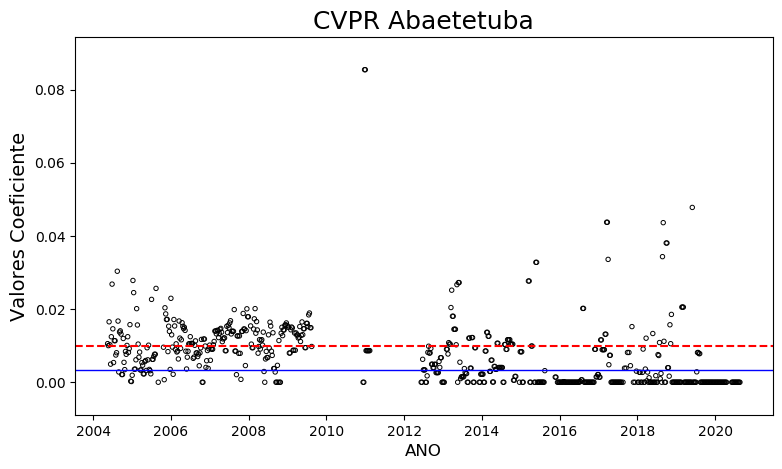

In [ ]:
#CODIGO PARA O CoefV
import matplotlib.dates as mdates
from matplotlib import ticker
from pylab import plot, show, legend, title, xlabel, ylabel, axis

g = plt.figure(figsize=(9, 5), dpi=100)
x = dt['DATA FINAL']
y = dt['Result']

plt.title('CVPR Abaetetuba', size=18)
plt.xlabel('ANO', size=12)
plt.ylabel('Valores Coeficiente', size=14)

b = dt['Result'].mean()
a = 1.10*b
lb = plt.scatter(x, y, s=10, facecolors='none', edgecolors='black',  linewidth=0.7)
plt.axhline(y=0.01, color='r', linestyle='--')
##plt.axhline(y=0.017916135297093617, color ='black', linestyle = '-')
plt.axhline(y=0.0033, color='blue', linestyle='-', linewidth=1 )
##plt.axhline(y=a, color='green', linestyle='-', linewidth=1)
##plt.savefig('spp.png')
plt.show()

In [ ]:
import statistics
x = statistics.mean(dt['Result']) 

In [ ]:
plt.savefig('foo.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
print (x)

0.015371740474951174


In [ ]:
dt['Result'].mean()

0.00734465784175611

In [ ]:
a = 1.10*b


In [ ]:
print(a)

0.008079123625931722


In [ ]:
dt['Result']

0      0.006708
1           NaN
2           NaN
3      0.016727
4           NaN
         ...   
465    0.020843
466    0.019913
467    0.015091
468    0.017126
469    0.014417
Name: Result, Length: 470, dtype: float64

In [ ]:
dt = dt.replace(np.nan, '', regex=True)

In [ ]:
#convertendo de string para float
dt['PRECO_MÉDIO_DISTRIBUIÇÃO'] = pd.to_numeric(dt['PREÇO MÉDIO DISTRIBUIÇÃO'], errors='coerce')

In [ ]:
dt['MRpc'] = (dt['PREÇO MÉDIO REVENDA'] - dt['PRECO_MÉDIO_DISTRIBUIÇÃO']) ##/dt['PREÇO MÉDIO REVENDA'] 

In [ ]:
dt['MRpc']

0      0.161468
1           NaN
2           NaN
3      0.169126
4           NaN
         ...   
465    0.093336
466    0.077984
467    0.125656
468    0.125659
469    0.121823
Name: MRpc, Length: 470, dtype: float64

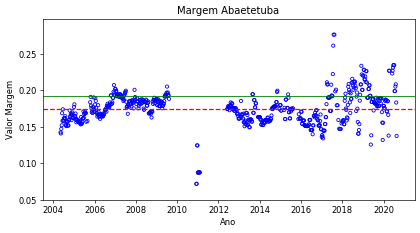

In [ ]:
##CODIGO PARA MARGEM PERCENTUAL

plt.figure(figsize=(8, 4), dpi=60)
x = dt['DATA INICIAL']
y = dt['MRpc']
plt.title('Margem Abaetetuba')
plt.xlabel('Ano')
plt.ylabel('Valor Margem')
b = dt['MRpc'].mean()
a = 1.10*b

lb = plt.scatter(x, y, s=15, facecolors='none', edgecolors='b')
plt.axhline(y=b, color='r', linestyle='--')
plt.axhline(y=a, color='green', linestyle='-', linewidth=1)
plt.show()

In [ ]:
dt['MARGEM MÉDIA REVENDA'] = pd.to_numeric(dt['MARGEM MÉDIA REVENDA'], errors='coerce')
dt['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] = pd.to_numeric(dt['COEF DE VARIAÇÃO DISTRIBUIÇÃO'], errors='coerce')

In [ ]:
dt.dtypes

DATA INICIAL                     datetime64[ns]
DATA FINAL                       datetime64[ns]
REGIÃO                                   object
ESTADO                                   object
MUNICÍPIO                                object
PRODUTO                                  object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PREÇO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PREÇO MÍNIMO REVENDA                    float64
PREÇO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                    float64
COEF DE VARIAÇÃO REVENDA                float64
PREÇO MÉDIO DISTRIBUIÇÃO                 object
DESVIO PADRÃO DISTRIBUIÇÃO               object
PREÇO MÍNIMO DISTRIBUIÇÃO                object
PREÇO MÁXIMO DISTRIBUIÇÃO                object
COEF DE VARIAÇÃO DISTRIBUIÇÃO           float64
Result                                   object
pmd                                     

In [ ]:
#correlação linear entre a margem de revenda e o coeficiente de variação de preços
x = dt['MARGEM MÉDIA REVENDA'] 
y = dt['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] 
x = np.nan_to_num(x)
y = np.nan_to_num(y)


In [ ]:
corr = pearsonr(x, y)

In [ ]:
print('Pearsons correlation: %.3f', corr)

Pearsons correlation: %.3f (0.11985364693953347, 0.0006503943895949178)


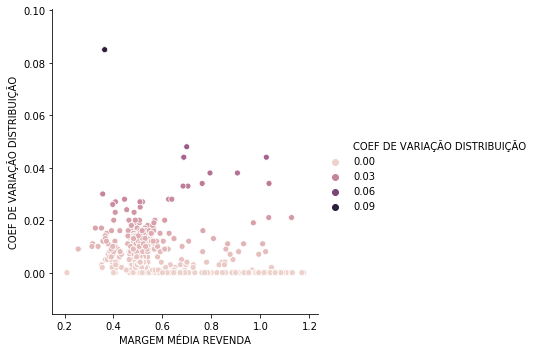

In [ ]:
sns.relplot(x="MARGEM MÉDIA REVENDA", y="COEF DE VARIAÇÃO DISTRIBUIÇÃO", data=dt, hue = 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'  );

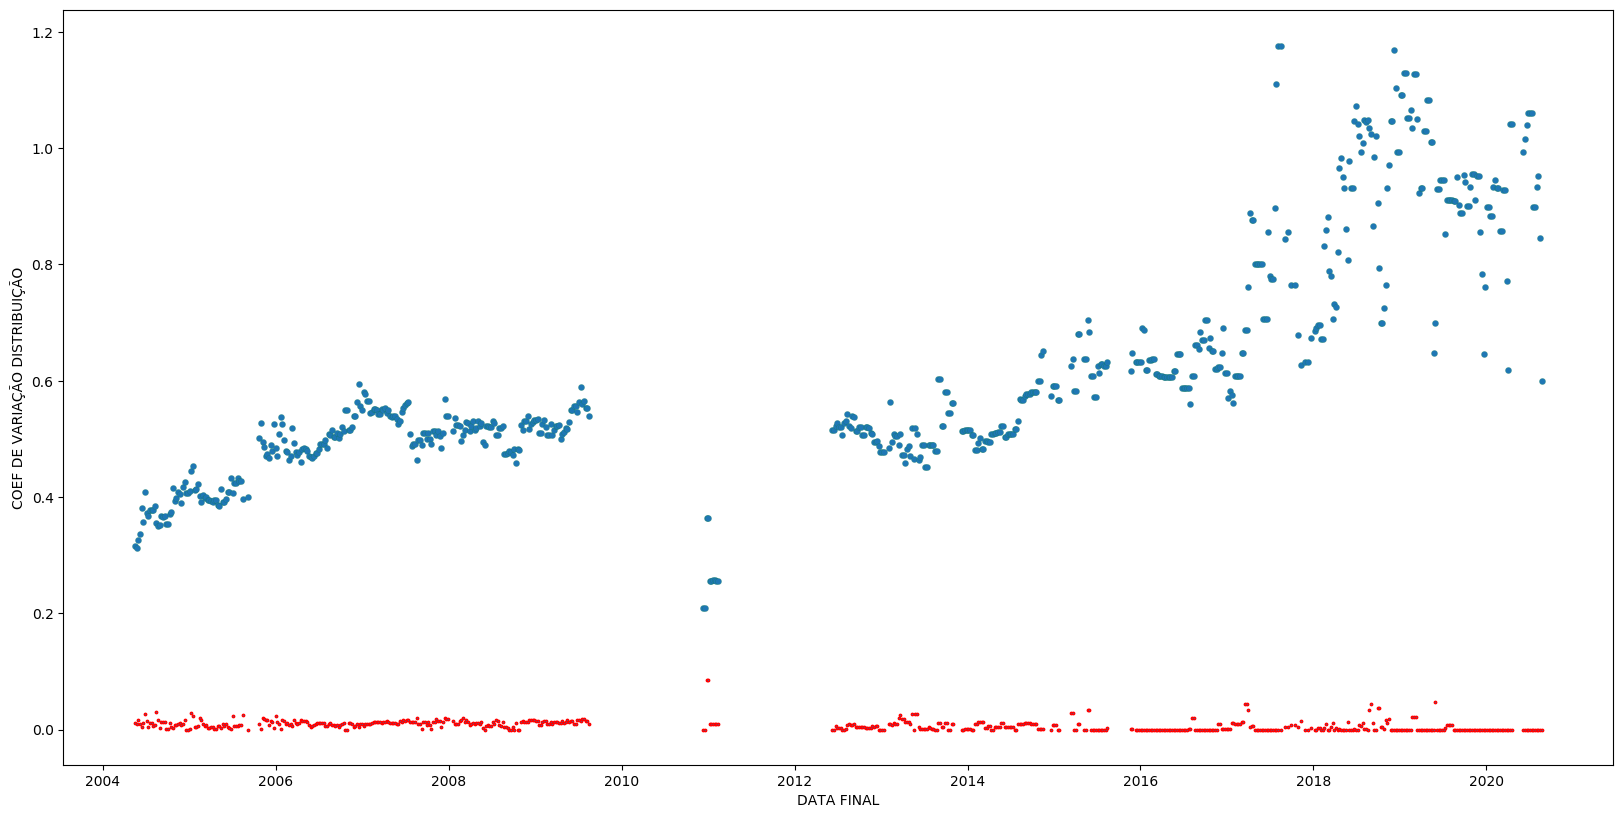

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=100 )

dt.plot(x = 'DATA FINAL', y='MRpc', ax = ax,kind='scatter', s = 20, facecolors='white', edgecolors='green',  linewidth=0.09 ) 
dt.plot(x = 'DATA FINAL', y = 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', ax = ax, kind='scatter', linewidth=1, s = 3, edgecolors='red',  facecolors='white', secondary_y = True) 

In [ ]:
dt['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].max()

0.085